<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part3/ch07_significance.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.1 Significance and P-Values

## The Logic of Hypothesis Testing

### The Setup

We have:
1. **Data**: Observations from an experiment or sample
2. **Question**: Is there a real effect, or just random variation?

### The Framework

**Null Hypothesis (H₀)**: The "nothing is happening" hypothesis
- Examples: "The drug has no effect", "The coin is fair", "Both designs convert equally"

**Alternative Hypothesis (H₁ or Hₐ)**: What we're trying to establish
- Examples: "The drug reduces blood pressure", "The coin is biased", "Design B converts better"

### The Logic

1. **Assume H₀ is true**
2. **Calculate**: How likely is our observed data (or more extreme) under H₀?
3. **Decide**: If very unlikely, reject H₀ in favor of H₁

```
┌─────────────────────────────────────────────┐
│  If H₀ is true                              │
│  ↓                                          │
│  How probable is our observed result?       │
│  ↓                                          │
│  If very improbable → Reject H₀             │
│  If reasonably probable → Don't reject H₀   │
└─────────────────────────────────────────────┘
```

## P-Values: The Core Concept

### Definition

**P-value**: The probability of observing data as extreme as (or more extreme than) what we actually observed, **assuming H₀ is true**.

$$
\text{p-value} = P(\text{data as extreme or more} \mid H_0 \text{ is true})
$$

### Interpretation

- **Small p-value** (typically < 0.05): Data is unlikely under H₀ → Evidence against H₀
- **Large p-value**: Data is consistent with H₀ → Insufficient evidence against H₀

### Common Misconception

❌ **WRONG**: "p-value is the probability that H₀ is true"
✅ **CORRECT**: "p-value is the probability of our data (or more extreme) if H₀ were true"

## Significance Levels

### The α Threshold

**Significance level (α)**: The threshold below which we reject H₀.

Common choices:
- α = 0.05 (5%) - standard in many fields
- α = 0.01 (1%) - more conservative
- α = 0.10 (10%) - more liberal

### Decision Rule

- If **p-value < α**: Reject H₀ (result is "statistically significant")
- If **p-value ≥ α**: Fail to reject H₀ (result is "not significant")

## Types of Errors

### The Truth Table

|                | H₀ is True | H₀ is False |
|----------------|------------|-------------|
| **Reject H₀**  | Type I Error (α) | ✓ Correct |
| **Don't Reject**| ✓ Correct | Type II Error (β) |

### Type I Error (False Positive)

- **Definition**: Rejecting H₀ when it's actually true
- **Probability**: α (the significance level)
- **Example**: Concluding a drug works when it doesn't

### Type II Error (False Negative)

- **Definition**: Failing to reject H₀ when it's actually false
- **Probability**: β (depends on effect size, sample size, α)
- **Example**: Missing a real drug effect

### Power

**Statistical Power** = 1 - β = Probability of correctly rejecting false H₀

- High power (0.80 or more) is desirable
- Power increases with: larger effects, larger samples, higher α

## Example 1: Coin Fairness Test

### Problem

You flip a coin 100 times and get 60 heads. Is the coin fair?

### Solution

H₀: The coin is fair (p = 0.5)
H₁: The coin is not fair (p ≠ 0.5)

Under H₀: Number of heads ~ N(50.0, 5.00²)

Observed: 60 heads
Z-score: 2.000

P-value (two-tailed): 0.0455

Decision: p-value (0.0455) < α (0.05)
Reject H₀. Evidence suggests the coin is biased.


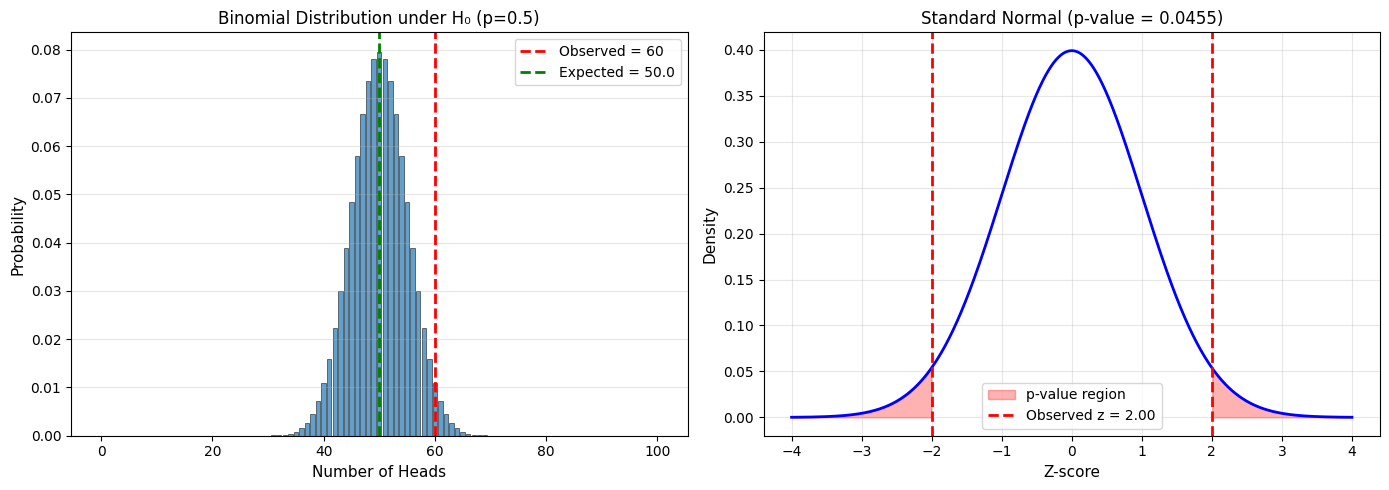

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data
n = 100
observed_heads = 60

# Hypotheses
print("H₀: The coin is fair (p = 0.5)")
print("H₁: The coin is not fair (p ≠ 0.5)")
print()

# Under H₀, number of heads ~ Binomial(n=100, p=0.5)
# For large n, approximate with normal distribution
p_null = 0.5
mean_null = n * p_null
std_null = np.sqrt(n * p_null * (1 - p_null))

print(f"Under H₀: Number of heads ~ N({mean_null}, {std_null:.2f}²)")
print()

# Z-score of observed result
z_score = (observed_heads - mean_null) / std_null
print(f"Observed: {observed_heads} heads")
print(f"Z-score: {z_score:.3f}")
print()

# P-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
print(f"P-value (two-tailed): {p_value:.4f}")
print()

# Decision
alpha = 0.05
if p_value < alpha:
    print(f"Decision: p-value ({p_value:.4f}) < α ({alpha})")
    print("Reject H₀. Evidence suggests the coin is biased.")
else:
    print(f"Decision: p-value ({p_value:.4f}) ≥ α ({alpha})")
    print("Fail to reject H₀. Insufficient evidence of bias.")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left: Binomial distribution under H₀
x = np.arange(0, 101)
binom_probs = stats.binom.pmf(x, n, p_null)

ax1.bar(x, binom_probs, alpha=0.7, edgecolor='black', linewidth=0.5)
ax1.axvline(observed_heads, color='red', linestyle='--', linewidth=2, 
            label=f'Observed = {observed_heads}')
ax1.axvline(mean_null, color='green', linestyle='--', linewidth=2, 
            label=f'Expected = {mean_null}')
ax1.set_xlabel('Number of Heads', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title('Binomial Distribution under H₀ (p=0.5)', fontsize=12)
ax1.legend()
ax1.grid(alpha=0.3, axis='y')

# Right: Standard normal showing p-value
z_range = np.linspace(-4, 4, 1000)
norm_pdf = stats.norm.pdf(z_range)

ax2.plot(z_range, norm_pdf, 'b-', linewidth=2)
ax2.fill_between(z_range[z_range <= -abs(z_score)], 0, 
                  stats.norm.pdf(z_range[z_range <= -abs(z_score)]),
                  alpha=0.3, color='red', label='p-value region')
ax2.fill_between(z_range[z_range >= abs(z_score)], 0,
                  stats.norm.pdf(z_range[z_range >= abs(z_score)]),
                  alpha=0.3, color='red')
ax2.axvline(z_score, color='red', linestyle='--', linewidth=2,
            label=f'Observed z = {z_score:.2f}')
ax2.axvline(-z_score, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Z-score', fontsize=11)
ax2.set_ylabel('Density', fontsize=11)
ax2.set_title(f'Standard Normal (p-value = {p_value:.4f})', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('coin_test.png', dpi=150, bbox_inches='tight')
plt.show()

## One-Tailed vs Two-Tailed Tests

### Two-Tailed Test

**H₁**: Parameter ≠ value (different in either direction)

Example: "The coin is biased" (could be biased toward heads OR tails)

P-value includes both tails of the distribution.

### One-Tailed Test

**H₁**: Parameter > value OR Parameter < value (specific direction)

Example: "The coin is biased toward heads" (only testing one direction)

P-value includes only one tail.

### Choosing

- **Two-tailed**: Default choice, more conservative
- **One-tailed**: Use only when you have a strong directional hypothesis **before** seeing data

⚠️ **Warning**: Don't switch to one-tailed after seeing your data - this is p-hacking!

## Example 2: One-Sample Mean Test

### Problem

A manufacturer claims light bulbs last 1000 hours on average. You test 25 bulbs: mean = 950 hours, std = 100 hours. Test the claim at α = 0.05.

### Solution

In [2]:
import numpy as np
from scipy import stats

# Data
n = 25
sample_mean = 950
sample_std = 100
claim_mean = 1000
alpha = 0.05

print("Hypothesis Test: One-Sample t-test")
print("="*50)
print(f"H₀: μ = {claim_mean} (manufacturer's claim is true)")
print(f"H₁: μ ≠ {claim_mean} (manufacturer's claim is false)")
print(f"Significance level: α = {alpha}")
print()

# Test statistic
se = sample_std / np.sqrt(n)
t_stat = (sample_mean - claim_mean) / se
df = n - 1

print(f"Sample mean: {sample_mean}")
print(f"Sample std: {sample_std}")
print(f"Standard error: {se:.2f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"Degrees of freedom: {df}")
print()

# P-value (two-tailed)
p_value = 2 * stats.t.cdf(t_stat, df)  # t_stat is negative
print(f"P-value: {p_value:.4f}")
print()

# Decision
if p_value < alpha:
    print(f"Decision: p-value ({p_value:.4f}) < α ({alpha})")
    print("Reject H₀. The manufacturer's claim is questionable.")
else:
    print(f"Decision: p-value ({p_value:.4f}) ≥ α ({alpha})")
    print("Fail to reject H₀. Insufficient evidence against the claim.")

# Using scipy's built-in function
t_stat_scipy, p_value_scipy = stats.ttest_1samp(
    np.random.normal(sample_mean, sample_std, n), claim_mean
)
print(f"\nVerification using scipy.stats.ttest_1samp:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")

# Confidence interval
t_crit = stats.t.ppf(1 - alpha/2, df)
ci_lower = sample_mean - t_crit * se
ci_upper = sample_mean + t_crit * se

print(f"\n95% Confidence Interval: [{ci_lower:.1f}, {ci_upper:.1f}]")
print(f"Claimed value {claim_mean} is {'NOT' if claim_mean < ci_lower or claim_mean > ci_upper else ''} in the CI")

Hypothesis Test: One-Sample t-test
H₀: μ = 1000 (manufacturer's claim is true)
H₁: μ ≠ 1000 (manufacturer's claim is false)
Significance level: α = 0.05

Sample mean: 950
Sample std: 100
Standard error: 20.00
t-statistic: -2.500
Degrees of freedom: 24

P-value: 0.0197

Decision: p-value (0.0197) < α (0.05)
Reject H₀. The manufacturer's claim is questionable.

Verification using scipy.stats.ttest_1samp:
t-statistic: -2.500, p-value: 0.0197

95% Confidence Interval: [908.7, 991.3]
Claimed value 1000 is NOT in the CI


## The Relationship Between CIs and Hypothesis Tests

### Key Insight

For a two-tailed test at significance level α:

> **Reject H₀: μ = μ₀** ⟺ **μ₀ is outside the (1-α)×100% confidence interval**

This provides an alternative way to test hypotheses using confidence intervals!

## Power Analysis

### What is Power?

Power = Probability of detecting an effect when it exists

### Factors Affecting Power

1. **Effect size**: Larger effects → higher power
2. **Sample size**: Larger n → higher power  
3. **Significance level**: Larger α → higher power (but more Type I errors)
4. **Variance**: Smaller σ → higher power

### Example: Power Calculation

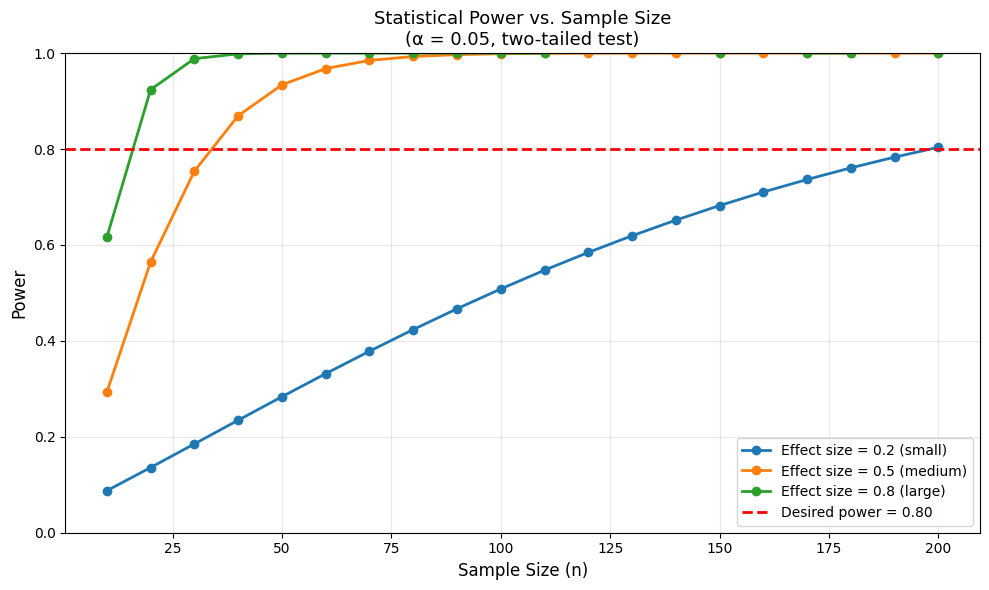

Sample Size Needed for 80% Power:
Effect size 0.2: n ≥ 200
Effect size 0.5: n ≥ 40
Effect size 0.8: n ≥ 20


In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def calculate_power(n, effect_size, alpha=0.05, sigma=1):
    """
    Calculate power for one-sample t-test.
    
    effect_size: difference between true mean and null mean (in units of data)
    """
    # Non-centrality parameter
    ncp = effect_size / (sigma / np.sqrt(n))
    
    # Critical value
    df = n - 1
    t_crit = stats.t.ppf(1 - alpha/2, df)
    
    # Power (using non-central t-distribution)
    power = 1 - stats.nct.cdf(t_crit, df, ncp) + stats.nct.cdf(-t_crit, df, ncp)
    
    return power

# Example: Detect mean difference of 0.5σ
effect_sizes = [0.2, 0.5, 0.8]  # Small, medium, large (Cohen's d)
sample_sizes = np.arange(10, 201, 10)

fig, ax = plt.subplots(figsize=(10, 6))

for es in effect_sizes:
    powers = [calculate_power(n, es) for n in sample_sizes]
    ax.plot(sample_sizes, powers, linewidth=2, marker='o', 
            label=f'Effect size = {es} ({"small" if es==0.2 else "medium" if es==0.5 else "large"})')

ax.axhline(0.8, color='red', linestyle='--', linewidth=2, 
           label='Desired power = 0.80')
ax.set_xlabel('Sample Size (n)', fontsize=12)
ax.set_ylabel('Power', fontsize=12)
ax.set_title('Statistical Power vs. Sample Size\n(α = 0.05, two-tailed test)', fontsize=13)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('power_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Sample Size Needed for 80% Power:")
print("="*50)
for es in effect_sizes:
    for n in sample_sizes:
        if calculate_power(n, es) >= 0.8:
            print(f"Effect size {es}: n ≥ {n}")
            break

## Summary

### The Hypothesis Testing Recipe

1. **State hypotheses**: H₀ and H₁
2. **Choose α**: Significance level (usually 0.05)
3. **Collect data**: Sample and compute test statistic
4. **Calculate p-value**: Probability under H₀
5. **Make decision**: Reject H₀ if p-value < α
6. **Interpret**: In context of the problem

### Key Formulas

**One-sample t-test**:
$$
t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} \sim t_{n-1}
$$

**Z-test** (σ known):
$$
z = \frac{\bar{x} - \mu_0}{\sigma/\sqrt{n}} \sim N(0,1)
$$

### Important Points

✅ p-value measures evidence against H₀  
✅ Small p-value → reject H₀  
✅ "Not significant" ≠ "no effect"  
✅ Statistical significance ≠ practical importance  
✅ Always report effect sizes, not just p-values  

❌ p-value ≠ P(H₀ is true)  
❌ Don't change hypotheses after seeing data  
❌ Don't confuse significance with importance  
❌ Don't p-hack (we'll discuss this later!)